# Anime Analysis 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#missing_values = ["na", "['na']", "['nan']"]
#df = pd.read_csv('./anime_list.csv', na_values=missing_values, sep=';')

In [3]:
df = pd.read_pickle("anime_df.pkl")
#df.to_pickle("anime_df.pkl")

In [16]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,NaN,2009,2010,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247.0,your name.,Kimi no Na wa.,Movie,1.0,107.0,2016,NaN,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592.0,A Silent Voice,Koe no Katachi,Movie,1.0,130.0,2016,NaN,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195.0,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10.0,NaN,2016,2016,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788.0,My Hero Academia 3,Boku no Hero Academia 3,TV,25.0,NaN,2018,2018,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939.0,Mob Psycho 100 II,NaN,TV,12.0,NaN,2019,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psyc...",Second Season of Mob Psycho 100.
6,9.274,15322.0,Haikyuu!! Second Season,NaN,TV,25.0,NaN,2015,2016,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375.0,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1.0,111.0,2013,NaN,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623.0,My Hero Academia 2,Boku no Hero Academia 2,TV,25.0,NaN,2017,2017,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192.0,Gintama (2015),Gintama°,TV,51.0,NaN,2015,2016,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [14]:
df.dtypes

Rating          float64
Votes           float64
Title            object
Alt Title        object
Format         category
Episodes        float64
Duration        float64
Start Year     category
End Year       category
Studio           object
Tags             object
Description      object
dtype: object

In [17]:
df.isnull().sum()

Rating         3060
Votes          3060
Title             0
Alt Title      7767
Format            0
Episodes        408
Duration       5436
Start Year      200
End Year       2692
Studio         3987
Tags            364
Description    5609
dtype: int64

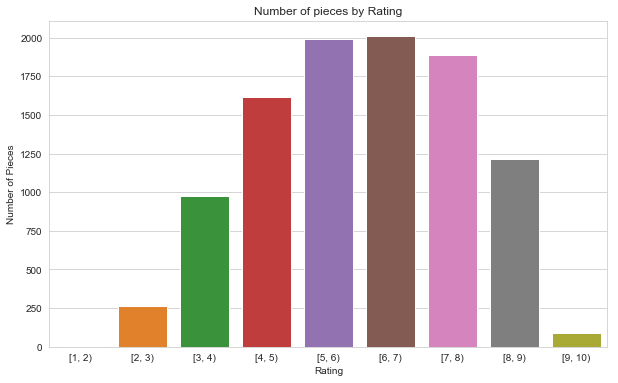

In [18]:
bins = range(1, 11)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
rating_bins = sns.barplot(x='index', y=0, data=pd.DataFrame(pd.cut(list(df['Rating']), bins, right=False).value_counts()).reset_index())
_ = rating_bins.set(xlabel='Rating', ylabel='Number of Pieces', title='Number of pieces by Rating')


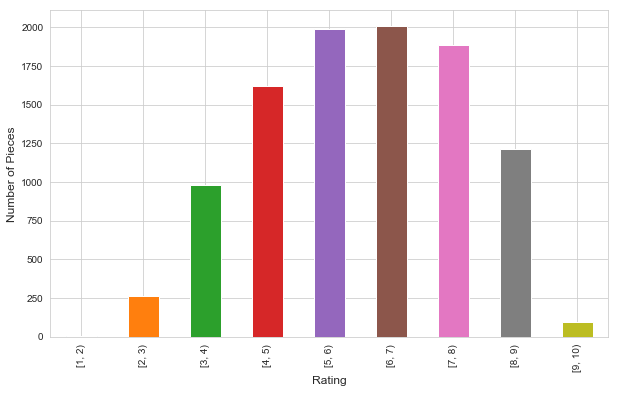

In [19]:
bins = range(1, 11)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = pd.cut(list(df['Rating']), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Rating', fontsize=12)
_ = ax.set_ylabel('Number of Pieces', fontsize=12)

In [20]:
def contains (col, elems):
    booleans = []
    for tags in df[col]:
        exists = True
        for item in elems:
            if type(tags) == float:
                exists = False
            elif item not in tags:
                exists = False
        if type(tags) == float:
            booleans.append(False)                   
        elif exists:
            booleans.append(True)
        else:
            booleans.append(False)
    return booleans

#### Plot relationship between movie duration and rating

In [21]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,NaN,2009,2010,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247.0,your name.,Kimi no Na wa.,Movie,1.0,107.0,2016,NaN,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592.0,A Silent Voice,Koe no Katachi,Movie,1.0,130.0,2016,NaN,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195.0,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10.0,NaN,2016,2016,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788.0,My Hero Academia 3,Boku no Hero Academia 3,TV,25.0,NaN,2018,2018,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939.0,Mob Psycho 100 II,NaN,TV,12.0,NaN,2019,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psyc...",Second Season of Mob Psycho 100.
6,9.274,15322.0,Haikyuu!! Second Season,NaN,TV,25.0,NaN,2015,2016,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375.0,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1.0,111.0,2013,NaN,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623.0,My Hero Academia 2,Boku no Hero Academia 2,TV,25.0,NaN,2017,2017,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192.0,Gintama (2015),Gintama°,TV,51.0,NaN,2015,2016,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [22]:
df.corr()

,Rating,Votes,Episodes,Duration
Rating,1.000000,0.405017,0.043777,0.474890
Votes,0.405017,1.000000,0.082934,0.310390
Episodes,0.043777,0.082934,1.000000,-0.062432
Duration,0.474890,0.310390,-0.062432,1.000000


In [23]:
df.loc[df['Format'] == 'Movie'].corr()

,Rating,Votes,Episodes,Duration
Rating,1.000000,0.369323,NaN,0.674047
Votes,0.369323,1.000000,NaN,0.291978
Episodes,NaN,NaN,NaN,NaN
Duration,0.674047,0.291978,NaN,1.000000


### 1. How does the duration of movies affect their rating?

#### Strong correlation!!

0.6740468363640132


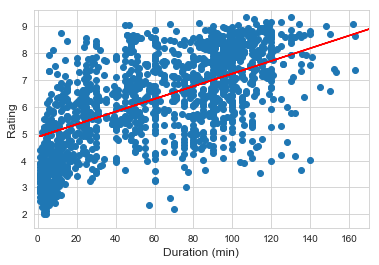

In [24]:
plt.scatter(df.loc[df['Format'] == 'Movie', 'Duration'], df.loc[df['Format'] == 'Movie', 'Rating'])
m = df.loc[df['Format'] == 'Movie', 'Duration'].corr(df.loc[df['Format'] == 'Movie', 'Rating'])

linear_regressor = LinearRegression()  # create object for the class
mean_dur = df.loc[df['Format'] == 'Movie', 'Duration'].mean()
mean_rat = df.loc[df['Format'] == 'Movie', 'Rating'].mean()
linear_regressor.fit(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), df.loc[df['Format'] == 'Movie', 'Rating'].fillna(value=mean_rat).values.reshape(-1, 1))  # perform linear regression
Y_pred = linear_regressor.predict(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1))  # make predictions

plt.plot(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), Y_pred, color='red')
plt.xlim(-2, 170)
plt.ylim(1.5, 9.6)
plt.xlabel('Duration (min)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
print(m)

In [25]:
def labelsFromBins(bins, left='[', sep=',', right=')'):
    labels = []
    for i in range(len(bins) - 1):
        label = left + str(bins[i]) + sep + str(bins[i + 1]) + right
        labels.append(label)
    return labels

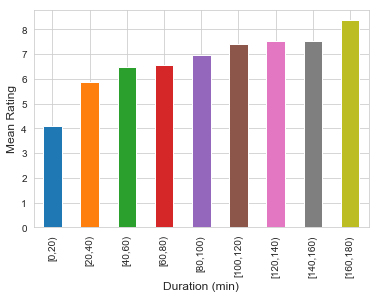

In [26]:
bins = range(0, 200, 20)
def durSplitter(df, ind):
    if df.loc[ind, 'Duration'] == np.NaN:
        return 'Null'
    for i in bins:
        if df.loc[ind, 'Duration'] >= i and df.loc[ind, 'Duration'] < (i + 20):
            return '[' + str(i) + ',' + str(i + 20) + ')'


ax = df.loc[df['Format'] == 'Movie'].groupby(lambda x: durSplitter(df, x))['Rating'].mean().sort_values().plot(kind='bar')
ax.set_xlabel('Duration (min)', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

### 2. How does the number of episodes affect rating?

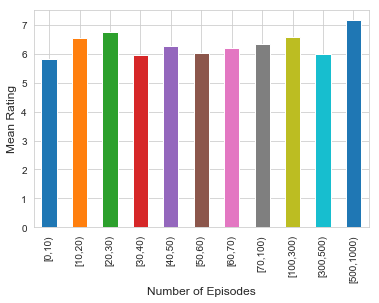

In [27]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, 300, 500, 1000]
def epsSplitter(df, ind):
    if df.loc[ind, 'Episodes'] == np.NaN:
        return 'Null'
    for i in range(len(bins) - 1):
        if df.loc[ind, 'Episodes'] >= bins[i] and df.loc[ind, 'Episodes'] < bins[i + 1]:
            return bins[i + 1]

ax = df.loc[df['Format'] == 'TV'].groupby(lambda x: epsSplitter(df, x))['Rating'].mean().plot(kind='bar')
ax.set_xlabel('Number of Episodes', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

### Find relationship between tags and rating

In [28]:
def listTags(tag_col):
    uniq_tags = []
    for tag_row in tag_col:
        if type(tag_row) != float:
            for each in tag_row:
                if each not in uniq_tags:
                    uniq_tags.append(each)
    return uniq_tags

In [29]:
tags = listTags(df['Tags'])

In [30]:
len(tags)

469

In [31]:
tags

['Action',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Shounen',
 'Conspiracy',
 'Military',
 'Siblings',
 'Violence',
 'Animal Abuse',
 'Based on a Manga',
 'Romance',
 'Body Swapping',
 'Opposites Attract',
 'School Life',
 'Supernatural',
 'Original Work',
 'Melancholy',
 'Bullying',
 'Mature Themes',
 'Suicide',
 'Sports',
 'Animeism',
 'School Club',
 'Tournaments',
 'Volleyball',
 'Comedy',
 'Sci Fi',
 'Superheroes',
 'Superpowers',
 'Psychic Powers',
 'Psychological',
 'Aliens',
 'Feudal Japan',
 'Samurai',
 'Swordplay',
 'Time Travel',
 'Weak to Strong',
 'Breaking the Fourth Wall',
 'Crude',
 'Gag',
 'Parody',
 'Slapstick',
 'LGBT Themes',
 'Thriller',
 'Based on a Visual Novel',
 'Monsters',
 'Horror',
 'Isolated Society',
 'Mind Games',
 'noitaminA',
 'Orphans',
 'Outside World',
 'Mecha',
 'Overpowered Main Characters',
 'Political',
 'Real Robot',
 'Rebellions',
 'Rivalries',
 'Royalty',
 'Terrorism',
 'Seinen',
 'Slice of Life',
 'Board Games',
 'Episodic',
 'Iyashi

In [32]:
%%time
tag_count = {tag: 0 for tag in tags}

for row in df['Tags']:
    if type(row) != float:
        for tag in row:
            tag_count[tag] += 1
            
tag_list = list(tag_count.keys())
count_list = list(tag_count.values())

CPU times: user 17.8 ms, sys: 1.3 ms, total: 19.1 ms
Wall time: 17.9 ms


In [33]:
rating_list = []
for each in tag_list:
    rating_list.append(df.loc[np.array(contains('Tags', [each])), 'Rating'].mean())

In [34]:
tag_df = pd.DataFrame(list(zip(tag_list, rating_list, count_list)), columns=['Tag', 'Rating', 'Count'])

In [35]:
tag_df.loc[tag_df['Count'] > 100].sort_values('Rating', ascending=False).head(40)

,Tag,Rating,Count
55,Overpowered Main Characters,7.846911,121
66,Iyashikei,7.787483,118
32,Psychological,7.466380,176
83,Contemporary Fantasy,7.413605,159
56,Political,7.321895,117
121,Urban Fantasy,7.317308,108
96,Based on a Light Novel,7.185417,633
162,Medieval,7.154571,104
2,Drama,7.129614,1297
24,School Club,7.097312,242


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

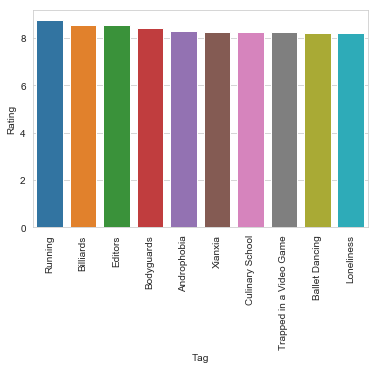

In [36]:
sns.set_style("whitegrid")
tag_rating_graph = sns.barplot(x="Tag", y="Rating", data=tag_df.sort_values('Rating', ascending=False).head(10))
plt.xticks(rotation=90)